# 1: IMPORT DATASETS AND LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
from chart_studio.plotly import plot, iplot
from plotly.offline import iplot

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import time

In [2]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [3]:
# Import csv file into pandas dataframe
df = pd.read_csv("mushrooms.csv")

In [4]:
df.shape

(8124, 23)

In [5]:
# print the first 5 rows of the dataframe
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# 2: PERFORM EXPLORATORY DATA ANALYSIS

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [8]:
# check the number of duplicated entries in the dataframe
 # since there are no duplicates, no further action is required
  
df.duplicated().sum()

0

In [9]:
for col in df.columns:
    print(col)
    print(df[col].unique())
    

class
['p' 'e']
cap-shape
['x' 'b' 's' 'f' 'k' 'c']
cap-surface
['s' 'y' 'f' 'g']
cap-color
['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises
['t' 'f']
odor
['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment
['f' 'a']
gill-spacing
['c' 'w']
gill-size
['n' 'b']
gill-color
['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape
['e' 't']
stalk-root
['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring
['s' 'f' 'k' 'y']
stalk-surface-below-ring
['s' 'f' 'y' 'k']
stalk-color-above-ring
['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring
['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type
['p']
veil-color
['w' 'n' 'o' 'y']
ring-number
['o' 't' 'n']
ring-type
['p' 'e' 'l' 'f' 'n']
spore-print-color
['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population
['s' 'n' 'a' 'v' 'y' 'c']
habitat
['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [10]:
# Delete columns with variance = 0
df.drop(columns=[col for col in df.columns if len(df[col].unique()) == 1], inplace=True)
df.shape

(8124, 22)

In [11]:
df.groupby("class").count()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,,,,,,,,,,,,,,,,,,,,,
e,4208,4208,4208,4208,4208,4208,4208,4208,4208,4208,...,4208,4208,4208,4208,4208,4208,4208,4208,4208,4208
p,3916,3916,3916,3916,3916,3916,3916,3916,3916,3916,...,3916,3916,3916,3916,3916,3916,3916,3916,3916,3916


# 3: PERFORM DATA VISUALIZATION

In [12]:
X_columns = df.columns[1:]
y_column = 'class'

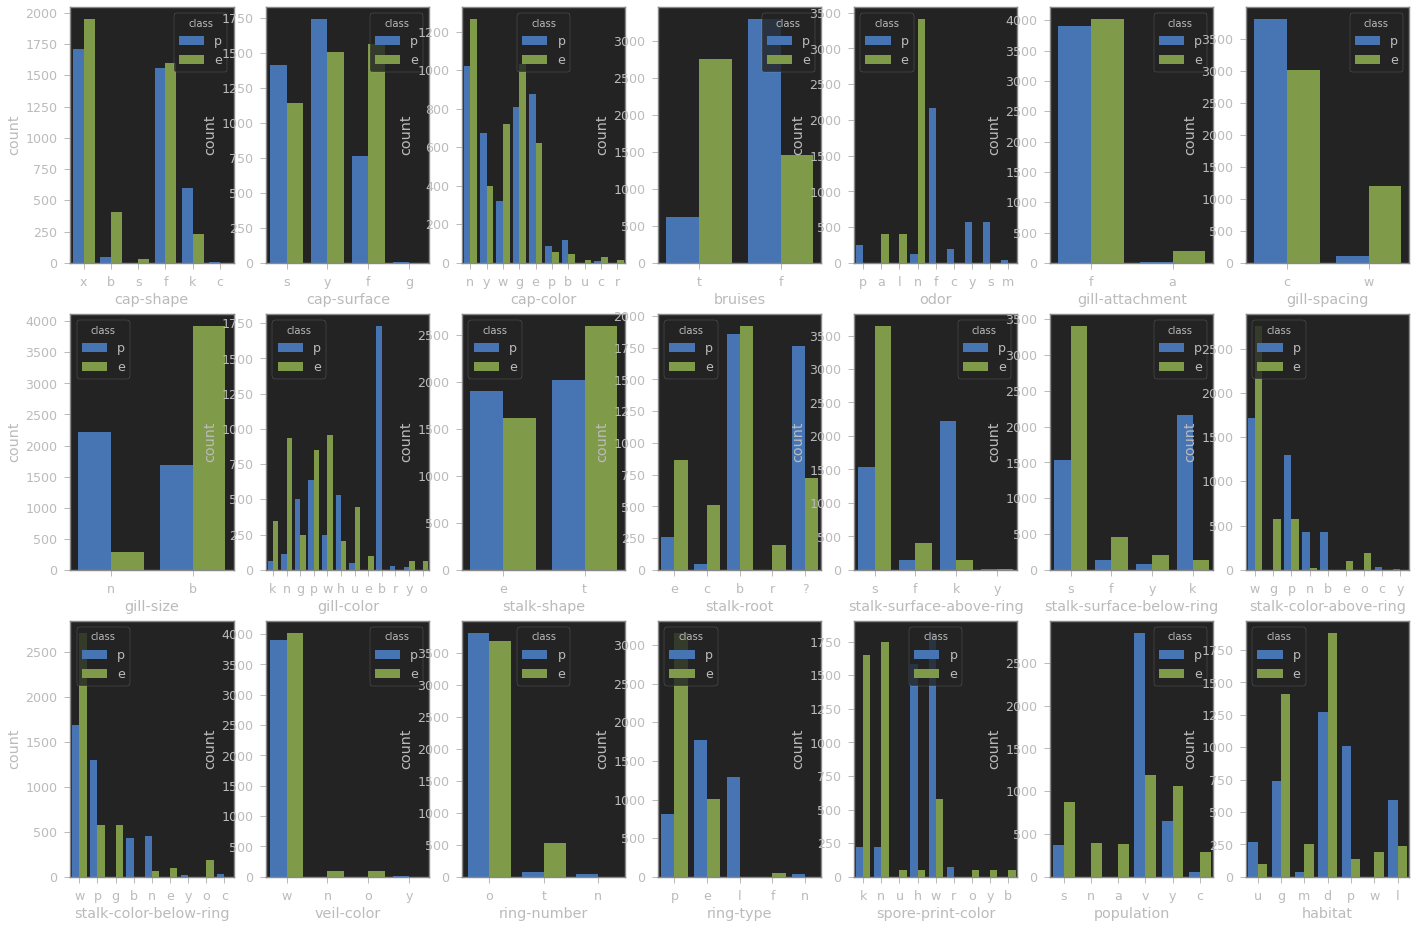

In [13]:
plt.subplots(3,7, figsize = (24,16))

for i in range(len(X_columns)):
    plt.subplot(3,7,i+1)
    sns.countplot(data = df, x = X_columns[i], hue = 'class')
    
plt.show()

# 4: Clustering

## 4.0:  Data preprocessing

In [14]:
# Encoding

o_enc = OrdinalEncoder()
l_enc = LabelEncoder()

df1 = df.copy()

df1[X_columns] = o_enc.fit_transform(df1[X_columns])
df1[y_column] = l_enc.fit_transform(df1[y_column])


X = df1.drop(['class'], axis = 1)
labels_true= df1['class']


In [15]:
labels_true.unique()

array([1, 0])

In [16]:
#Scaling
scaler = StandardScaler()

scaled_X = scaler.fit_transform(X)


In [17]:
scaled_X.shape

(8124, 21)

In [18]:
exec_time = [0]*3


## 4.1: Clustering using k-means


In [19]:
first_time = time.time()
kmeans = KMeans(2)
kmeans.fit(scaled_X)

exec_time[0] = time.time() - first_time
 #second

In [20]:
kmeans_labels_pred = kmeans.labels_
df['kmeans_labels_pred'] = kmeans_labels_pred
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,kmeans_labels_pred
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,w,o,p,k,s,u,0
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,w,o,p,n,n,g,0
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,w,o,p,n,n,m,0
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,w,o,p,k,s,u,0
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,w,o,e,n,a,g,0


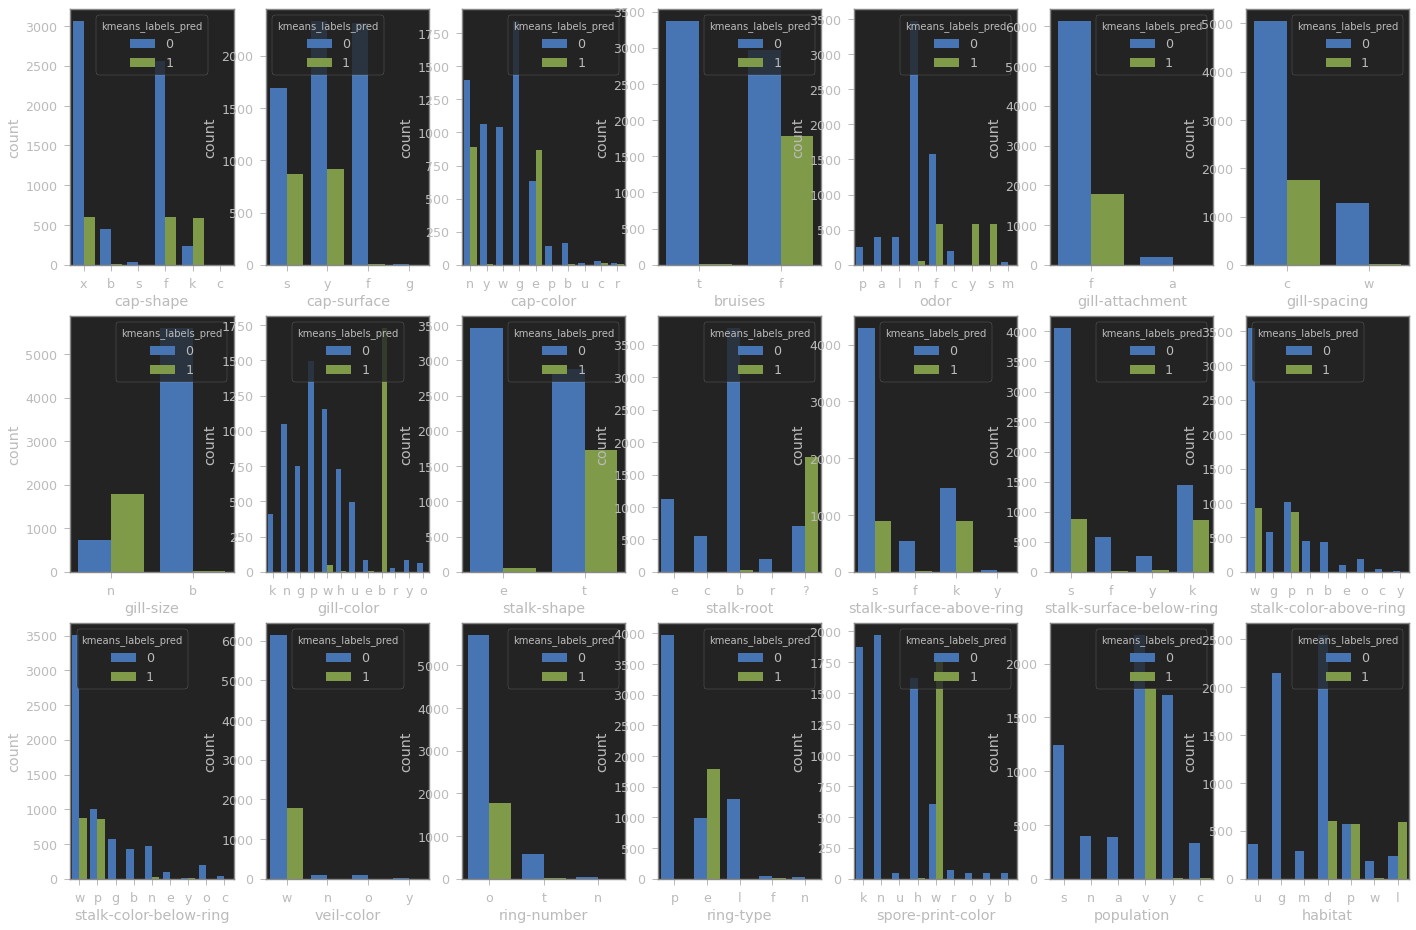

In [21]:
plt.subplots(3,7, figsize = (24,16))

for i in range(len(X_columns)):
    plt.subplot(3,7,i+1)
    sns.countplot(data = df, x = X_columns[i], hue = 'kmeans_labels_pred')
    
plt.show()

## 4.2: Clustering Using Agglomerative method

In [22]:
from sklearn.cluster import AgglomerativeClustering

In [23]:
first_time = time.time()

agnes = AgglomerativeClustering().fit(scaled_X)

exec_time[1]  = time.time() - first_time



agnes_labels_pred = agnes.labels_
df['agnes_labels_pred'] = agnes_labels_pred


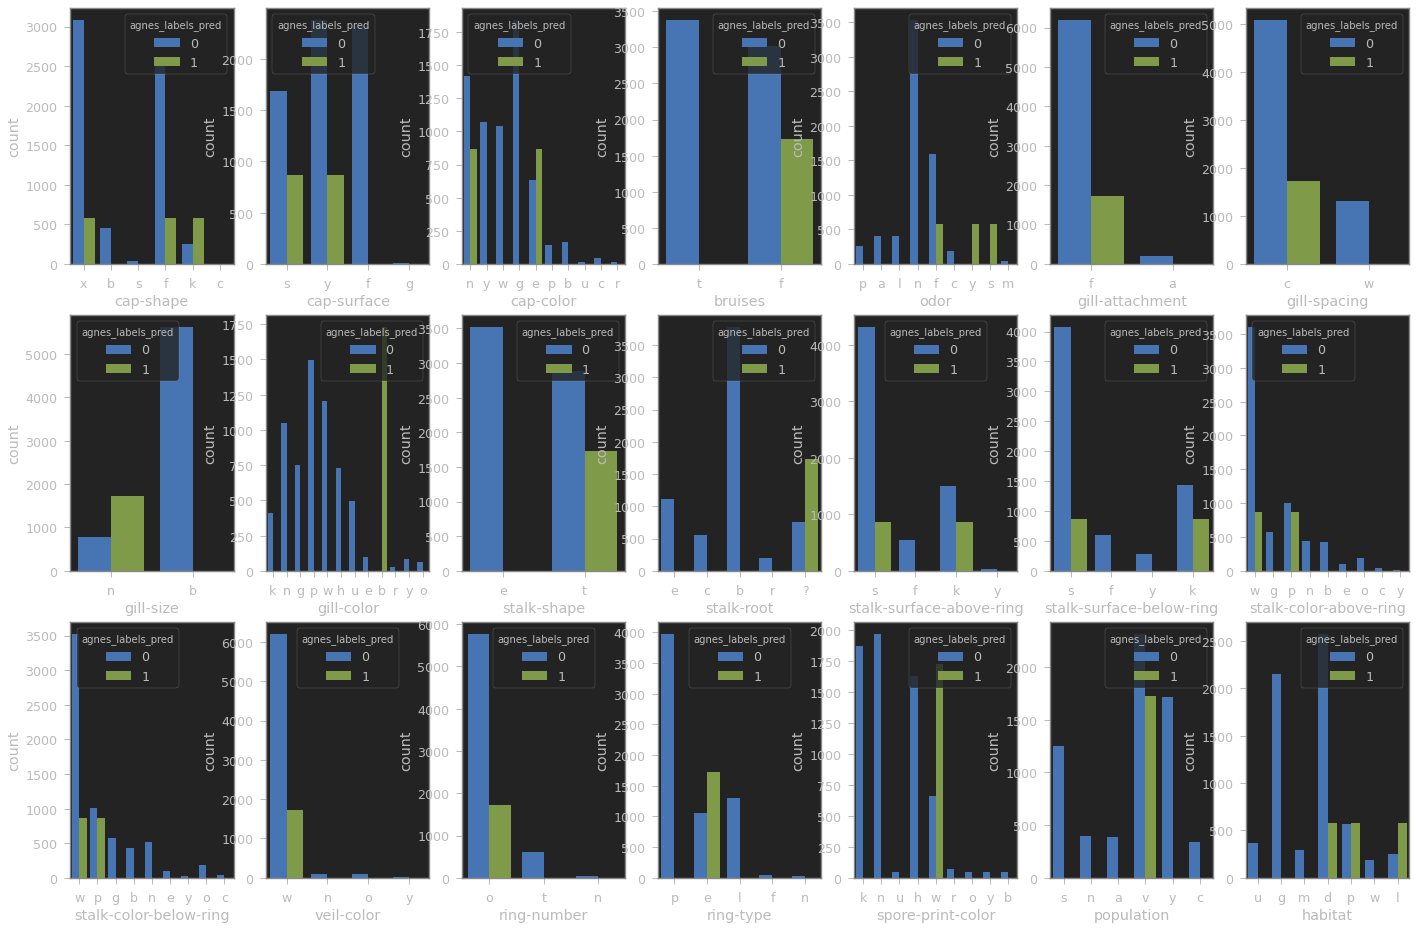

In [24]:
plt.subplots(3,7, figsize = (24,16))

for i in range(len(X_columns)):
    plt.subplot(3,7,i+1)
    sns.countplot(data = df, x = X_columns[i], hue = 'agnes_labels_pred')
    
plt.show()

## 4.3: Clustering using ROCK

In [25]:
from pyclustering.cluster.rock import rock

In [26]:
# Create an instance of the ROCK algorithm for cluster analysis. Two clusters should be allocated.
first_time = time.time()

rock_instance = rock(scaled_X, 1.0, 2, threshold=0.8)

print(time.time() - first_time)

# EPS: similarity threshold
# number_clusters

335.48363876342773


In [27]:

# Run cluster analysis.
first_time = time.time()

rock_instance.process()

exec_time[2]  = time.time() - first_time


In [28]:
# Obtain results of clustering.
rock_labels_pred = rock_instance.get_clusters()
len(rock_labels_pred)

877

In [47]:
rock_labels_pred_class = np.full((8124), -1)
rock_labels_pred_class.shape

(8124,)

In [64]:
for sub_list in rock_labels_pred:
    rock_labels_pred_class[sub_list] = df1["class"].loc[sub_list]

df['agnes_labels_pred'] = pd.Series(rock_labels_pred_class)

np.count_nonzero(rock_labels_pred_class==0)

4208

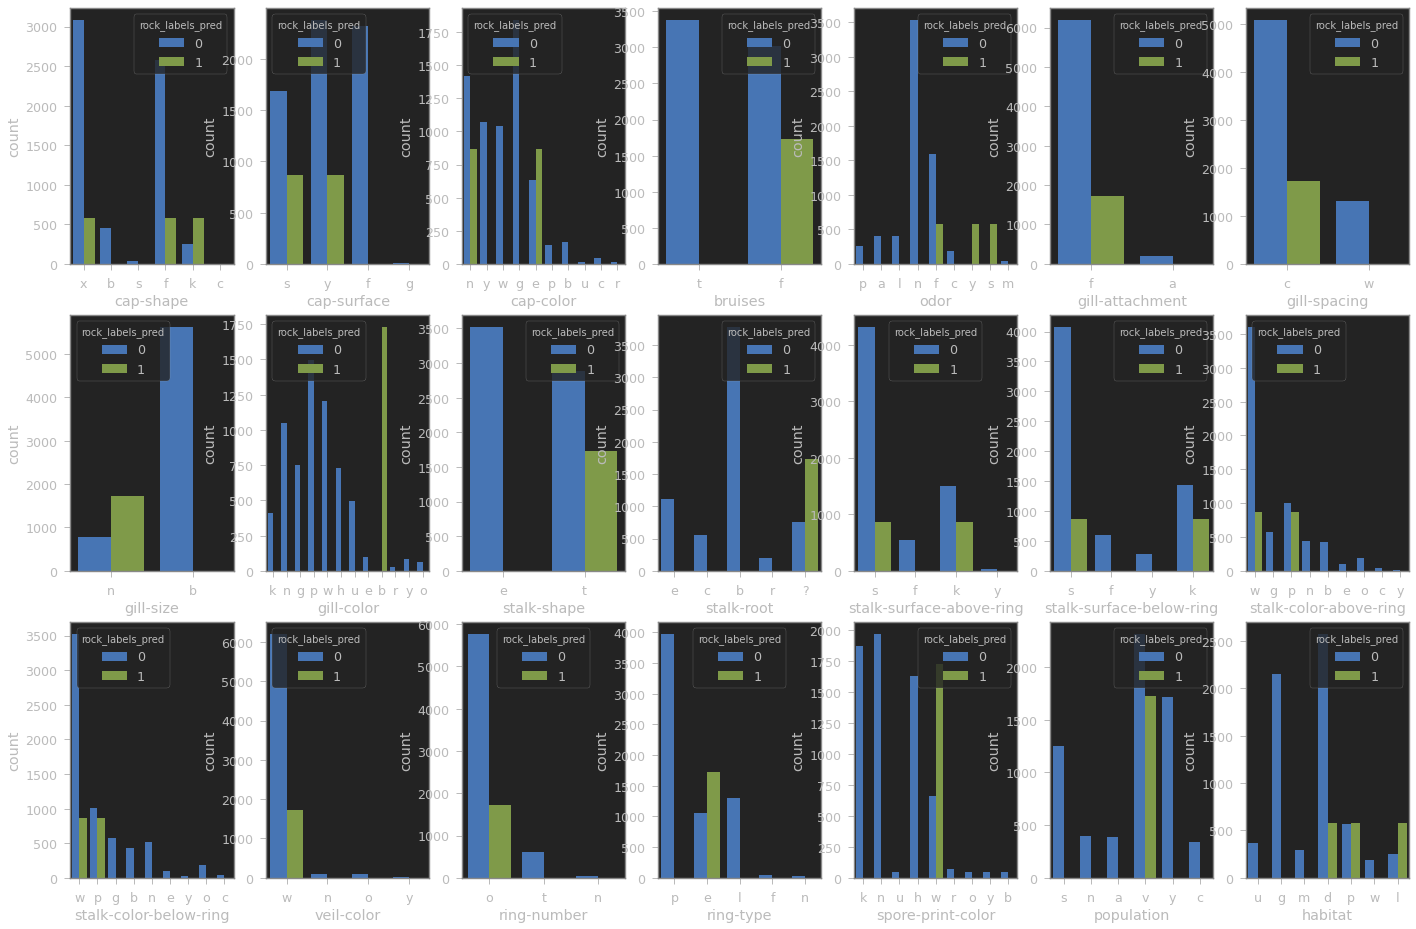

In [65]:
plt.subplots(3,7, figsize = (24,16))

for i in range(len(X_columns)):
    plt.subplot(3,7,i+1)
    sns.countplot(data = df, x = X_columns[i], hue = 'rock_labels_pred')
    
plt.show()

# 5: Clustering performance evaluation

In [66]:
df_final = pd.DataFrame(columns=[['Algorithm', 'Purity', 'exec_time', ]])


## 5.1: Purity

In [67]:
from sklearn import metrics

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

In [68]:
df_final['Purity'] = pd.Series([
    purity_score(labels_true, df['kmeans_labels_pred']),
    purity_score(labels_true, df['agnes_labels_pred']),
   purity_score(labels_true, df['agnes_labels_pred'])
])


In [69]:
df_final['Algorithm'] = pd.Series(['Kmeans', 'AGNES', 'ROCK'])
df_final['exec_time'] = pd.Series(exec_time)

df_final

,Algorithm,Purity,exec_time
0,Kmeans,0.729197,1.528076
1,AGNES,1.000000,2.708436
2,ROCK,1.000000,33533.230134


In [70]:
33533.2301347 / 3600 #Rock Esec time Hours

9.314786148527778

# Thank You